In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [23]:
data_2014 = pd.read_csv('data/data_2014.csv', encoding='unicode_escape')
data_2018 = pd.read_csv('data/data_2018.csv', encoding='unicode_escape')
data_2022 = pd.read_csv('data/data_2022.csv', encoding='unicode_escape')

In [24]:
deps = np.array(data_2014['Dpto'])
#data_2022['Partido']

In [25]:
y = np.ones(33)
for i in range(33):
    if data_2018['Partido'][i] == data_2014['Partido'][i]:
        y[i] = 1
    else:
        y[i] = 0
y.shape

(33,)

In [26]:
X = np.array([data_2018['Porcentaje']-data_2014['Porcentaje']]).T

In [27]:
classifier = LogisticRegression().fit(X, y)

In [28]:
classifier.classes_

array([0., 1.])

In [29]:
classifier.coef_,classifier.intercept_

(array([[0.02971916]]), array([-0.03742596]))

In [30]:
Y_predict = classifier.predict(X)
Y_predict

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

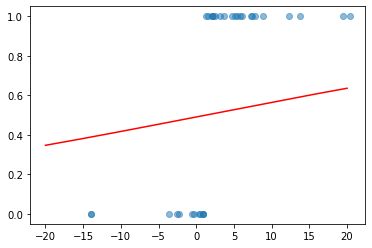

In [31]:
t = np.linspace(-20,20,1000)
p = 1/(1+np.exp(-classifier.coef_*t-classifier.intercept_))

plt.scatter(X,Y_predict,alpha=0.5)
plt.plot(t,p.T,'r')

In [32]:
test = np.ones(33)
val = data_2022['Partido'] == data_2018['Partido']
for i in range(33):
    if val[i]:
        test[i] = 1
    else:
        test[i] = 0
test

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.])

In [33]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(test,Y_predict)

array([[10, 10],
       [ 2, 11]], dtype=int64)

In [34]:
sklearn.metrics.f1_score(test, Y_predict, pos_label=0),sklearn.metrics.f1_score(test, Y_predict, pos_label=1)

(0.625, 0.6470588235294118)

In [35]:
proba = classifier.predict_proba(X)
n_probas = 100
probas_cut_alto = np.linspace(0.0,1.0,n_probas)
precision_probas = np.ones(n_probas)
recall_probas = np.ones(n_probas)
f1_probas = np.ones(n_probas)

for i in range(n_probas):
    ii = proba[:,1] > probas_cut_alto[i]
    Y_predict[ii] = 1
    Y_predict[~ii] = 0
    precision_probas[i] = sklearn.metrics.precision_score(test, Y_predict, pos_label=1,zero_division = 0)
    recall_probas[i] = sklearn.metrics.recall_score(test, Y_predict, pos_label=1,zero_division = 0)
    f1_probas[i] = sklearn.metrics.f1_score(test, Y_predict, pos_label=1,zero_division = 0)

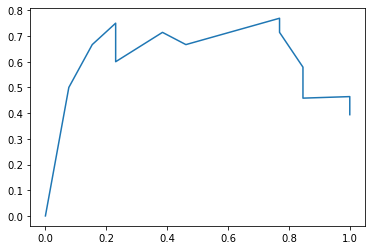

In [36]:
plt.plot(recall_probas, precision_probas)

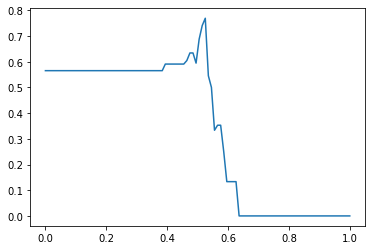

In [37]:
plt.plot(probas_cut_alto, f1_probas)